In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dilan = pd.read_csv('dilans_data.csv', delimiter = ';', names = ['my_date', 'event', 'country', 'user_id', 'source', 'topic'])
dilan.head()

,my_date,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


In [3]:
dilan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597902 entries, 0 to 597901
Data columns (total 6 columns):
my_date    597902 non-null object
event      597902 non-null object
country    597902 non-null object
user_id    590284 non-null float64
source     581877 non-null object
topic      210023 non-null object
dtypes: float64(1), object(5)
memory usage: 27.4+ MB


In [4]:
dilan.shape

(597902, 6)

In [5]:
dilan.event.value_counts()

read         581877
buy            8407
subscribe      7618
Name: event, dtype: int64

In [6]:
dilan.country.value_counts()

country_5     149732
country_7     132067
country_2     130076
country_4      71258
country_6      63752
               ...  
2458324793         1
2458186203         1
2458259298         1
2458158325         1
2458345512         1
Name: country, Length: 9198, dtype: int64

In [8]:
dilan.user_id.value_counts()   #  in this column users are mixed with the 2 products: e-book of 8 $ and video of 80 $.

8.000000e+00    6640
8.000000e+01    1767
2.458174e+09      58
2.458284e+09      52
2.458281e+09      52
                ... 
2.458185e+09       1
2.458318e+09       1
2.458258e+09       1
2.458261e+09       1
2.458322e+09       1
Name: user_id, Length: 210025, dtype: int64

##### READ event

In [9]:
read = dilan[dilan.event == 'read']
read.head()

,my_date,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


In [10]:
read.user_id.nunique()   # unique number of readers

210023

In [11]:
read.source.value_counts()

Asia             118833
Reddit           105216
North America     92767
AdWords           63065
Europe            54136
South America     51706
SEO               41742
Africa            27481
Australia         26931
Name: source, dtype: int64

In [12]:
read.topic.value_counts()

Asia             76092
Europe           39561
North America    37567
South America    25095
Africa           15913
Australia        15795
Name: topic, dtype: int64

We can see above that the source column is mixed with the topic one.

In [13]:
source_values = ['Reddit', 'SEO', 'AdWords']

In [14]:
topic_values = ['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Australia']

In [15]:
returning_readers = read[read.source.isin(topic_values)]
returning_readers.head()

,my_date,event,country,user_id,source,topic
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America,NaN
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia,NaN
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa,NaN
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia,NaN
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America,NaN


In [16]:
returning_readers.shape

(371854, 6)

In [18]:
returning_readers.user_id.nunique() # unique returning users

66231

In [19]:
returning_readers.user_id.value_counts()

2.458174e+09    57
2.458198e+09    51
2.458203e+09    51
2.458284e+09    51
2.458281e+09    51
                ..
2.458330e+09     1
2.458207e+09     1
2.458361e+09     1
2.458214e+09     1
2.458243e+09     1
Name: user_id, Length: 66231, dtype: int64

In [20]:
returning_readers.drop(['topic'], axis=1, inplace=True)

C:\Users\OMEN\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
returning_readers.rename({'source': 'topic'}, axis=1, inplace=True)

C:\Users\OMEN\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [22]:
returning_readers.head()

,my_date,event,country,user_id,topic
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America


In [23]:
returning_readers.topic.value_counts()

Asia             118833
North America     92767
Europe            54136
South America     51706
Africa            27481
Australia         26931
Name: topic, dtype: int64

In [24]:
returning_readers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371854 entries, 170 to 597901
Data columns (total 5 columns):
my_date    371854 non-null object
event      371854 non-null object
country    371854 non-null object
user_id    371854 non-null float64
topic      371854 non-null object
dtypes: float64(1), object(4)
memory usage: 17.0+ MB


In [25]:
#  Select only the first time readers

read_first = read[read.source.isin(source_values)]
read_first.head()

,my_date,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


In [27]:
read_first.shape   #  First time readers

(210023, 6)

In [81]:
read_first.source.value_counts() # first visitors by source

Reddit     105216
AdWords     63065
SEO         41742
Name: source, dtype: int64

In [29]:
read_first.topic.value_counts()

Asia             76092
Europe           39561
North America    37567
South America    25095
Africa           15913
Australia        15795
Name: topic, dtype: int64

In [30]:
read_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210023 entries, 0 to 597769
Data columns (total 6 columns):
my_date    210023 non-null object
event      210023 non-null object
country    210023 non-null object
user_id    210023 non-null float64
source     210023 non-null object
topic      210023 non-null object
dtypes: float64(1), object(5)
memory usage: 11.2+ MB


In [31]:
r1 = read_first.groupby('country').count()['user_id']
r1

country
country_1     5076
country_2    50675
country_3     2742
country_4    12751
country_5    40349
country_6    31156
country_7    51791
country_8    15483
Name: user_id, dtype: int64

In [32]:
r1 = r1.to_frame()
r1.reset_index(inplace=True)
r1.rename({'user_id' : 'first_visits'}, axis=1, inplace=True)
r1.head()

,country,first_visits
0,country_1,5076
1,country_2,50675
2,country_3,2742
3,country_4,12751
4,country_5,40349


##### Checking the number of returning readers and their country

In [33]:
list_ret = returning_readers.user_id.value_counts()
list_ret

2.458174e+09    57
2.458198e+09    51
2.458203e+09    51
2.458284e+09    51
2.458281e+09    51
                ..
2.458330e+09     1
2.458207e+09     1
2.458361e+09     1
2.458214e+09     1
2.458243e+09     1
Name: user_id, Length: 66231, dtype: int64

In [34]:
list_ret = list_ret.to_frame()
list_ret.reset_index(inplace=True)
list_ret.head()

,index,user_id
0,2.458174e+09,57
1,2.458198e+09,51
2,2.458203e+09,51
3,2.458284e+09,51
4,2.458281e+09,51


In [35]:
list_ret.rename({'index':'user_id', 'user_id':'nr_visits'}, axis=1, inplace=True)

In [36]:
list_ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66231 entries, 0 to 66230
Data columns (total 2 columns):
user_id      66231 non-null float64
nr_visits    66231 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.0 MB


In [37]:
rrdt = read_first.merge(list_ret, on='user_id', how='right')
rrdt.head()

,my_date,event,country,user_id,source,topic,nr_visits
0,2018-01-01 00:06:06,read,country_2,2.458151e+09,Reddit,Europe,1
1,2018-01-01 00:07:57,read,country_5,2.458151e+09,AdWords,Asia,4
2,2018-01-01 00:09:11,read,country_5,2.458151e+09,Reddit,Asia,5
3,2018-01-01 00:11:22,read,country_7,2.458151e+09,SEO,North America,6
4,2018-01-01 00:13:06,read,country_2,2.458151e+09,Reddit,Asia,1


In [38]:
rrdt.source.value_counts()  # source and nr. of returning unique visitors

Reddit     31167
SEO        24604
AdWords    10460
Name: source, dtype: int64

In [47]:
rrdt.nr_visits.sum()

371854

In [40]:
r2 = rrdt.groupby('country').count()['user_id']
r2

country
country_1      191
country_2    14269
country_3     1082
country_4    10167
country_5    19477
country_6     5930
country_7    14417
country_8      698
Name: user_id, dtype: int64

In [41]:
r2 = r2.to_frame()
r2.reset_index(inplace=True)
r2

,country,user_id
0,country_1,191
1,country_2,14269
2,country_3,1082
3,country_4,10167
4,country_5,19477
5,country_6,5930
6,country_7,14417
7,country_8,698


In [43]:
r2.rename({'user_id' : 'returning_visitors'}, axis=1, inplace=True) # number of unique returning visitors by country
r2

,country,returning_visitors
0,country_1,191
1,country_2,14269
2,country_3,1082
3,country_4,10167
4,country_5,19477
5,country_6,5930
6,country_7,14417
7,country_8,698


##### Checking the number of visits for returning users by country

In [56]:
visits = returning_readers.country.value_counts() # number of returning visits by country
visits

country_5    109383
country_7     80276
country_2     79401
country_4     58507
country_6     32596
country_3      6386
country_8      4150
country_1      1155
Name: country, dtype: int64

In [57]:
visits = visits.to_frame()
visits.reset_index(inplace=True)
visits

,index,country
0,country_5,109383
1,country_7,80276
2,country_2,79401
3,country_4,58507
4,country_6,32596
5,country_3,6386
6,country_8,4150
7,country_1,1155


In [58]:
visits.rename({'index' : 'country', 'country':'nr_visits'}, axis=1, inplace=True)
visits

,country,nr_visits
0,country_5,109383
1,country_7,80276
2,country_2,79401
3,country_4,58507
4,country_6,32596
5,country_3,6386
6,country_8,4150
7,country_1,1155


In [59]:
r3 = r1.merge(r2, on='country', how='outer')
r3

,country,first_visits,returning_visitors
0,country_1,5076,191
1,country_2,50675,14269
2,country_3,2742,1082
3,country_4,12751,10167
4,country_5,40349,19477
5,country_6,31156,5930
6,country_7,51791,14417
7,country_8,15483,698


In [60]:
r4 = r3.merge(visits, on='country', how='outer')
r4

,country,first_visits,returning_visitors,nr_visits
0,country_1,5076,191,1155
1,country_2,50675,14269,79401
2,country_3,2742,1082,6386
3,country_4,12751,10167,58507
4,country_5,40349,19477,109383
5,country_6,31156,5930,32596
6,country_7,51791,14417,80276
7,country_8,15483,698,4150


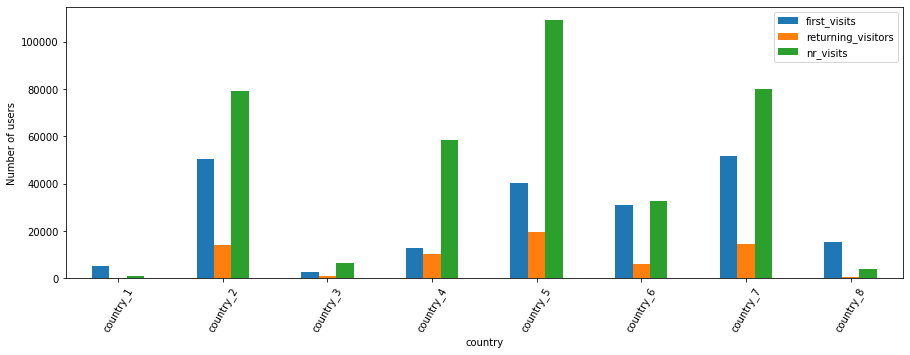

In [79]:
r4.plot(x='country', kind='bar', figsize=(15,5))
plt.xticks(rotation=60)
plt.ylabel('Number of users')
plt.savefig('Reading activity.png')

##### Analyzing readers by topic and source

### TOPIC

In [72]:
topic_tabel = returning_readers.groupby(['country', 'topic']).count()['user_id']
topic_tabel

country    topic        
country_1  Africa              57
           Asia               252
           Australia           89
           Europe             154
           North America      416
           South America      187
country_2  Africa            5765
           Asia             25406
           Australia         5964
           Europe           11073
           North America    20038
           South America    11155
country_3  Africa             514
           Asia              2044
           Australia          453
           Europe             877
           North America     1582
           South America      916
country_4  Africa            4239
           Asia             19307
           Australia         4295
           Europe            9500
           North America    13393
           South America     7773
country_5  Africa            8173
           Asia             35316
           Australia         7862
           Europe           16454
           North Americ

In [74]:
topic_tabel= topic_tabel.to_frame()
topic_tabel.reset_index(inplace=True)

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [75]:
topic_tabel.head()

,country,topic,user_id
0,country_1,Africa,57
1,country_1,Asia,252
2,country_1,Australia,89
3,country_1,Europe,154
4,country_1,North America,416


In [76]:
topic_tabel.rename({'user_id':'users'}, axis=1, inplace=True)
topic_tabel.head()

,country,topic,users
0,country_1,Africa,57
1,country_1,Asia,252
2,country_1,Australia,89
3,country_1,Europe,154
4,country_1,North America,416


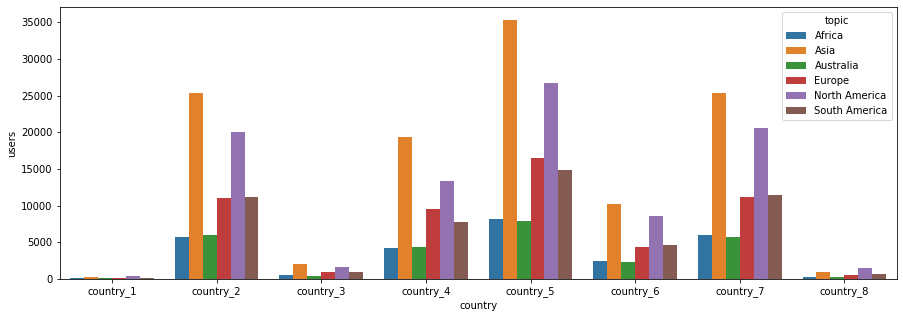

In [80]:
plt.figure(figsize=(15,5))
sns.barplot(data=topic_tabel, x='country', y='users', hue='topic')
plt.savefig('Returning_readers_topic.png')

### SOURCE for returning users and frequency of visits

In [82]:
r5 = read_first.merge(returning_readers, on='user_id', how='right')
r5.head()

,my_date_x,event_x,country_x,user_id,source,topic_x,my_date_y,event_y,country_y,topic_y
0,2018-01-01 00:06:06,read,country_2,2.458151e+09,Reddit,Europe,2018-03-27 02:29:22,read,country_2,North America
1,2018-01-01 00:07:57,read,country_5,2.458151e+09,AdWords,Asia,2018-03-04 09:26:30,read,country_5,Asia
2,2018-01-01 00:07:57,read,country_5,2.458151e+09,AdWords,Asia,2018-03-05 04:33:44,read,country_5,Europe
3,2018-01-01 00:07:57,read,country_5,2.458151e+09,AdWords,Asia,2018-03-05 06:49:44,read,country_5,North America
4,2018-01-01 00:07:57,read,country_5,2.458151e+09,AdWords,Asia,2018-03-05 11:50:44,read,country_5,South America


In [83]:
r5.shape

(371854, 10)

In [85]:
r5.source.value_counts() # number of visits by source

Reddit     173160
SEO        140161
AdWords     58533
Name: source, dtype: int64

## SUBSCRIBERS

In [86]:
subscribe = dilan[dilan.event == 'subscribe']
subscribe.head()

,my_date,event,country,user_id,source,topic
10,2018-01-01 00:07:41,subscribe,2458151268,NaN,NaN,NaN
11,2018-01-01 00:07:44,subscribe,2458151267,NaN,NaN,NaN
53,2018-01-01 00:40:55,subscribe,2458151309,NaN,NaN,NaN
101,2018-01-01 01:26:26,subscribe,2458151358,NaN,NaN,NaN
105,2018-01-01 01:30:39,subscribe,2458151361,NaN,NaN,NaN


In [87]:
subscribe.drop(['user_id', 'source', 'topic'], axis=1, inplace=True)

C:\Users\OMEN\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
subscribe.rename({'country': 'user_id'}, axis=1, inplace=True)

C:\Users\OMEN\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [89]:
subscribe.head()

,my_date,event,user_id
10,2018-01-01 00:07:41,subscribe,2458151268
11,2018-01-01 00:07:44,subscribe,2458151267
53,2018-01-01 00:40:55,subscribe,2458151309
101,2018-01-01 01:26:26,subscribe,2458151358
105,2018-01-01 01:30:39,subscribe,2458151361


In [90]:
subscribe.shape

(7618, 3)

In [91]:
subscribe.user_id.nunique()

7618

In [92]:
subscribe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 10 to 597717
Data columns (total 3 columns):
my_date    7618 non-null object
event      7618 non-null object
user_id    7618 non-null object
dtypes: object(3)
memory usage: 238.1+ KB


In [93]:
subscribe.user_id = subscribe.user_id.astype(float)

C:\Users\OMEN\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [94]:
subscribe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 10 to 597717
Data columns (total 3 columns):
my_date    7618 non-null object
event      7618 non-null object
user_id    7618 non-null float64
dtypes: float64(1), object(2)
memory usage: 238.1+ KB


#### FIRST READERS AND SUBSCRIBERS

In [95]:
rsubs = read_first.merge(subscribe, on='user_id', how='right')
rsubs.head()

,my_date_x,event_x,country,user_id,source,topic,my_date_y,event_y
0,2018-01-01 00:06:06,read,country_2,2.458151e+09,Reddit,Europe,2018-01-01 00:07:44,subscribe
1,2018-01-01 00:06:15,read,country_6,2.458151e+09,AdWords,Europe,2018-01-01 00:07:41,subscribe
2,2018-01-01 00:08:57,read,country_7,2.458151e+09,SEO,Australia,2018-01-02 20:33:06,subscribe
3,2018-01-01 00:13:39,read,country_4,2.458151e+09,SEO,North America,2018-01-04 01:53:26,subscribe
4,2018-01-01 00:20:18,read,country_5,2.458151e+09,SEO,North America,2018-01-03 16:50:17,subscribe


In [96]:
sub2 = rsubs.groupby('country').count()['user_id']
sub2

country
country_1      28
country_2    1558
country_3     160
country_4    1419
country_5    2334
country_6     546
country_7    1470
country_8     103
Name: user_id, dtype: int64

In [97]:
sub2 = sub2.to_frame()
sub2.reset_index(inplace=True)

In [98]:
sub2.rename({'user_id' : 'subscribers'}, axis=1, inplace=True)

In [99]:
sub2

,country,subscribers
0,country_1,28
1,country_2,1558
2,country_3,160
3,country_4,1419
4,country_5,2334
5,country_6,546
6,country_7,1470
7,country_8,103


In [100]:
rsubs.source.value_counts() # source and subscribers

Reddit     3443
SEO        3103
AdWords    1072
Name: source, dtype: int64

### BUYERS

In [101]:
buy = dilan[dilan.event == 'buy']
buy.head()

,my_date,event,country,user_id,source,topic
320,2018-01-01 04:04:59,buy,2458151555,8.0,NaN,NaN
745,2018-01-01 09:28:00,buy,2458151933,8.0,NaN,NaN
1073,2018-01-01 13:23:16,buy,2458152245,8.0,NaN,NaN
1150,2018-01-01 14:20:43,buy,2458152315,8.0,NaN,NaN
1351,2018-01-01 16:56:04,buy,2458152371,8.0,NaN,NaN


In [102]:
buy.shape

(8407, 6)

In [103]:
buy.rename({'country': 'user_id', 'user_id': 'products'}, axis=1, inplace=True)

In [104]:
buy.head()

,my_date,event,user_id,products,source,topic
320,2018-01-01 04:04:59,buy,2458151555,8.0,NaN,NaN
745,2018-01-01 09:28:00,buy,2458151933,8.0,NaN,NaN
1073,2018-01-01 13:23:16,buy,2458152245,8.0,NaN,NaN
1150,2018-01-01 14:20:43,buy,2458152315,8.0,NaN,NaN
1351,2018-01-01 16:56:04,buy,2458152371,8.0,NaN,NaN


In [105]:
buy.drop(['topic', 'source'], axis=1, inplace=True)

In [106]:
buy.head()

,my_date,event,user_id,products
320,2018-01-01 04:04:59,buy,2458151555,8.0
745,2018-01-01 09:28:00,buy,2458151933,8.0
1073,2018-01-01 13:23:16,buy,2458152245,8.0
1150,2018-01-01 14:20:43,buy,2458152315,8.0
1351,2018-01-01 16:56:04,buy,2458152371,8.0


In [107]:
buy.products.value_counts()

8.0     6640
80.0    1767
Name: products, dtype: int64

In [108]:
buy.user_id.nunique()

6648

In [109]:
buy.products.sum()

194480.0

In [110]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8407 entries, 320 to 597750
Data columns (total 4 columns):
my_date     8407 non-null object
event       8407 non-null object
user_id     8407 non-null object
products    8407 non-null float64
dtypes: float64(1), object(3)
memory usage: 328.4+ KB


In [111]:
buy.user_id = buy.user_id.astype(float)

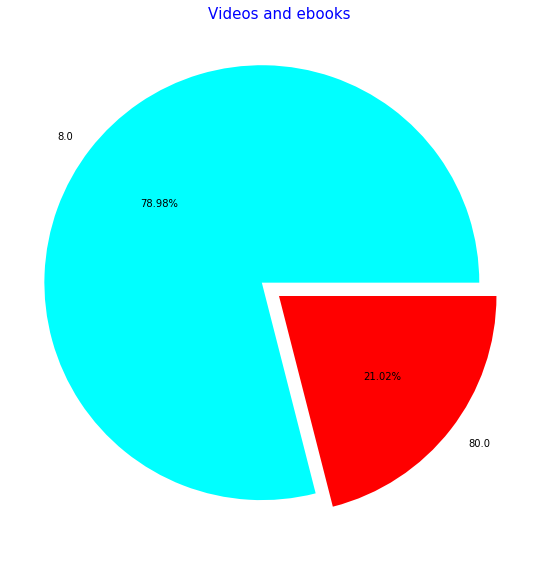

In [113]:
labels = buy.products.value_counts().index
colors = ['cyan','red']
explode = [0.1,0]      # explode 1st slice
sizes = buy.products.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Videos and ebooks',color = 'blue',fontsize = 15)
plt.savefig('Products.png')

### FIRST READERS AND BUYERS

In [114]:
rbuy = read_first.merge(buy, on='user_id', how='right')
rbuy.head()

,my_date_x,event_x,country,user_id,source,topic,my_date_y,event_y,products
0,2018-01-01 00:13:39,read,country_4,2.458151e+09,SEO,North America,2018-01-04 00:50:27,buy,8.0
1,2018-01-01 00:13:39,read,country_4,2.458151e+09,SEO,North America,2018-01-05 10:23:05,buy,80.0
2,2018-01-01 00:56:27,read,country_6,2.458151e+09,SEO,Asia,2018-01-10 02:09:21,buy,8.0
3,2018-01-01 01:19:01,read,country_5,2.458151e+09,Reddit,Asia,2018-02-24 18:22:05,buy,8.0
4,2018-01-01 01:32:38,read,country_5,2.458151e+09,Reddit,Asia,2018-01-22 08:09:06,buy,8.0


In [115]:
rbuy_tabel = rbuy.groupby(['country', 'products']).count()['user_id']
rbuy_tabel

country    products
country_1  8.0           25
           80.0           9
country_2  8.0         1441
           80.0         350
country_3  8.0          112
           80.0          34
country_4  8.0         1093
           80.0         309
country_5  8.0         1970
           80.0         527
country_6  8.0          534
           80.0         152
country_7  8.0         1380
           80.0         359
country_8  8.0           85
           80.0          27
Name: user_id, dtype: int64

In [116]:
rbuy_tabel = rbuy_tabel.to_frame()
rbuy_tabel.reset_index(inplace=True)

In [117]:
rbuy_tabel

,country,products,user_id
0,country_1,8.0,25
1,country_1,80.0,9
2,country_2,8.0,1441
3,country_2,80.0,350
4,country_3,8.0,112
5,country_3,80.0,34
6,country_4,8.0,1093
7,country_4,80.0,309
8,country_5,8.0,1970
9,country_5,80.0,527


In [118]:
video = rbuy_tabel[rbuy_tabel.products == 80]
video.rename({'products' : 'video', 'user_id':'video_buyers'}, axis=1, inplace=True)

In [119]:
video

,country,video,video_buyers
1,country_1,80.0,9
3,country_2,80.0,350
5,country_3,80.0,34
7,country_4,80.0,309
9,country_5,80.0,527
11,country_6,80.0,152
13,country_7,80.0,359
15,country_8,80.0,27


In [120]:
ebook = rbuy_tabel[rbuy_tabel.products == 8]
ebook.rename({'products' : 'ebook', 'user_id':'ebook_buyers'}, axis=1, inplace=True)

In [121]:
ebook

,country,ebook,ebook_buyers
0,country_1,8.0,25
2,country_2,8.0,1441
4,country_3,8.0,112
6,country_4,8.0,1093
8,country_5,8.0,1970
10,country_6,8.0,534
12,country_7,8.0,1380
14,country_8,8.0,85


In [122]:
b1 = ebook.merge(video, on='country', how='outer')
b1

,country,ebook,ebook_buyers,video,video_buyers
0,country_1,8.0,25,80.0,9
1,country_2,8.0,1441,80.0,350
2,country_3,8.0,112,80.0,34
3,country_4,8.0,1093,80.0,309
4,country_5,8.0,1970,80.0,527
5,country_6,8.0,534,80.0,152
6,country_7,8.0,1380,80.0,359
7,country_8,8.0,85,80.0,27


### USER ACTIVITY ON ALL EVENTS  BY COUNTRY

In [123]:
f1 = r4.merge(sub2, on='country', how='right')
f1

,country,first_visits,returning_visitors,nr_visits,subscribers
0,country_1,5076,191,1155,28
1,country_2,50675,14269,79401,1558
2,country_3,2742,1082,6386,160
3,country_4,12751,10167,58507,1419
4,country_5,40349,19477,109383,2334
5,country_6,31156,5930,32596,546
6,country_7,51791,14417,80276,1470
7,country_8,15483,698,4150,103


In [124]:
f2=f1.merge(b1, on='country', how='outer')
f2

,country,first_visits,returning_visitors,nr_visits,subscribers,ebook,ebook_buyers,video,video_buyers
0,country_1,5076,191,1155,28,8.0,25,80.0,9
1,country_2,50675,14269,79401,1558,8.0,1441,80.0,350
2,country_3,2742,1082,6386,160,8.0,112,80.0,34
3,country_4,12751,10167,58507,1419,8.0,1093,80.0,309
4,country_5,40349,19477,109383,2334,8.0,1970,80.0,527
5,country_6,31156,5930,32596,546,8.0,534,80.0,152
6,country_7,51791,14417,80276,1470,8.0,1380,80.0,359
7,country_8,15483,698,4150,103,8.0,85,80.0,27


### FUNNEL ANALYSIS BY SOURCE

In [125]:
read_first.source.value_counts()  # source and first visits

Reddit     105216
AdWords     63065
SEO         41742
Name: source, dtype: int64

In [126]:
rbuy.source.value_counts() # source and number of buyers

Reddit     3903
SEO        3233
AdWords    1271
Name: source, dtype: int64

In [127]:
rbuy.groupby(['source', 'products']).count()['user_id'] # source and products

source   products
AdWords  8.0         1028
         80.0         243
Reddit   8.0         3090
         80.0         813
SEO      8.0         2522
         80.0         711
Name: user_id, dtype: int64

In [128]:
rrdt.source.value_counts()  # source and nr. of returning unique visitors

Reddit     31167
SEO        24604
AdWords    10460
Name: source, dtype: int64

In [129]:
r5.source.value_counts() # number of visits by source

Reddit     173160
SEO        140161
AdWords     58533
Name: source, dtype: int64

In [130]:
rsubs.source.value_counts() # source and subscribers

Reddit     3443
SEO        3103
AdWords    1072
Name: source, dtype: int64

In [131]:
unique_buyers = buy.user_id.value_counts()
unique_buyers

2.458315e+09    2
2.458289e+09    2
2.458330e+09    2
2.458322e+09    2
2.458209e+09    2
               ..
2.458338e+09    1
2.458310e+09    1
2.458297e+09    1
2.458233e+09    1
2.458226e+09    1
Name: user_id, Length: 6648, dtype: int64

In [132]:
unique_buyers = unique_buyers.to_frame()
unique_buyers.reset_index(inplace=True)

In [133]:
unique_buyers.head()

,index,user_id
0,2.458315e+09,2
1,2.458289e+09,2
2,2.458330e+09,2
3,2.458322e+09,2
4,2.458209e+09,2


In [134]:
unique_buyers.rename({'index' : 'user_id', 'user_id':'number'}, axis=1, inplace=True)

In [135]:
unique_buyers.shape

(6648, 2)

In [136]:
ubuy = read_first.merge(unique_buyers, on='user_id', how='right')
ubuy.head()

,my_date,event,country,user_id,source,topic,number
0,2018-01-01 00:13:39,read,country_4,2.458151e+09,SEO,North America,2
1,2018-01-01 00:56:27,read,country_6,2.458151e+09,SEO,Asia,1
2,2018-01-01 01:19:01,read,country_5,2.458151e+09,Reddit,Asia,1
3,2018-01-01 01:32:38,read,country_5,2.458151e+09,Reddit,Asia,1
4,2018-01-01 01:35:40,read,country_5,2.458151e+09,SEO,North America,1


In [137]:
ubuy.source.value_counts()  # source and number of unique buyers

Reddit     3094
SEO        2525
AdWords    1029
Name: source, dtype: int64

#### On Google Sheets I made a tabel and chart with user activity by source

### ANALYZING DATE OF THE WEEK FOR RETURNING USERS AND BUYERS

In [138]:
returning_readers.my_date = pd.to_datetime(returning_readers.my_date)

In [139]:
returning_readers.my_date.dt.month.value_counts()

3    208835
2    124724
1     38295
Name: my_date, dtype: int64

In [140]:
returning_readers.my_date.dt.hour.value_counts()

6     17494
5     17303
7     17277
8     16873
4     16833
9     16653
10    16538
3     16413
11    16122
12    15657
2     15611
1     15277
13    15234
15    14908
16    14711
14    14697
20    14425
17    14385
0     14380
18    14365
22    14215
23    14166
19    14161
21    14156
Name: my_date, dtype: int64

In [141]:
returning_readers.my_date.dt.weekday_name.value_counts()

Thursday     58087
Friday       56673
Saturday     53769
Tuesday      53218
Wednesday    51733
Sunday       51527
Monday       46847
Name: my_date, dtype: int64

In [142]:
buy.my_date = pd.to_datetime(buy.my_date)

In [143]:
buy.my_date.dt.month.value_counts()

3    4895
2    2564
1     948
Name: my_date, dtype: int64

In [144]:
buy.my_date.dt.hour.value_counts()

4     409
8     374
12    371
5     368
18    367
16    366
7     365
22    365
9     365
21    361
20    357
6     353
3     353
1     352
13    344
0     343
10    337
19    333
15    328
14    328
23    321
17    320
11    315
2     312
Name: my_date, dtype: int64

In [145]:
buy.my_date.dt.weekday_name.value_counts()

Monday       1302
Friday       1297
Sunday       1289
Tuesday      1273
Thursday     1188
Saturday     1103
Wednesday     955
Name: my_date, dtype: int64

In [146]:
buy2 = buy.copy()

In [147]:
buy2['date'] = pd.to_datetime(buy2['my_date']).dt.date
buy2['time'] = pd.to_datetime(buy2['my_date']).dt.time

In [148]:
buy2.date = pd.to_datetime(buy2.date)

In [149]:
buy2.time = pd.to_datetime(buy2.time, format='%H:%M:%S').dt.time

In [150]:
march = buy2[buy2.date > '2018-02-28']
march.head()

,my_date,event,user_id,products,date,time
297603,2018-03-01 00:00:32,buy,2.458248e+09,80.0,2018-03-01,00:00:32
297690,2018-03-01 00:13:48,buy,2.458271e+09,8.0,2018-03-01,00:13:48
297694,2018-03-01 00:14:26,buy,2.458266e+09,8.0,2018-03-01,00:14:26
297759,2018-03-01 00:23:48,buy,2.458219e+09,8.0,2018-03-01,00:23:48
297791,2018-03-01 00:27:56,buy,2.458220e+09,80.0,2018-03-01,00:27:56


In [152]:
m1 = march.groupby(['date', 'products']).count()['user_id']
m1 = m1.to_frame()
m1.reset_index(inplace=True)
m1.rename({'user_id':'buyers'}, axis=1, inplace=True)
m1

,date,products,buyers
0,2018-03-01,8.0,112
1,2018-03-01,80.0,25
2,2018-03-02,8.0,197
3,2018-03-02,80.0,24
4,2018-03-03,8.0,66
5,2018-03-03,80.0,47
6,2018-03-04,8.0,204
7,2018-03-04,80.0,40
8,2018-03-05,8.0,134
9,2018-03-05,80.0,51


In [153]:
m1.date = pd.to_datetime(m1.date)

In [154]:
m1.date = pd.to_datetime(m1.date, format='%Y:%m:%d').dt.date

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

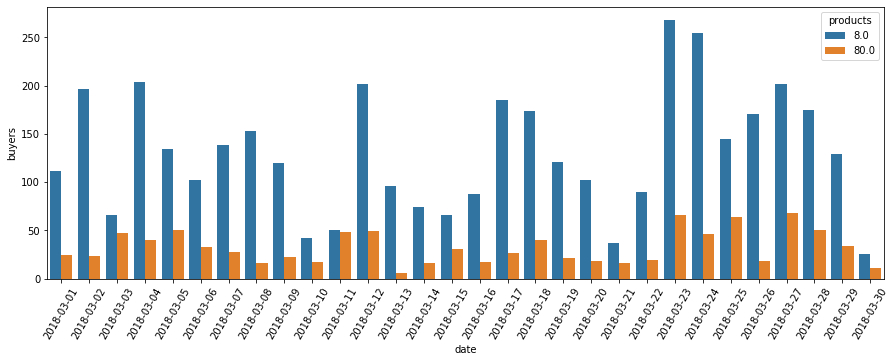

In [155]:
plt.figure(figsize=(15,5))
sns.barplot(data=m1, x='date', y='buyers', hue='products')
plt.xticks(rotation=60)

##### On 23rd and 24th of March there were the largest purchases (268, 254)